# In this notebook I will try nn for colorizing 1 picture and try to explain why it work 

Before trying this notebook you should run 'create_train_test_data.py' to create test/train data becurse i didn't push all images to git

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(os.curdir))))

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

Imports

In [3]:
import os
import datetime
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential, Model
from keras.preprocessing.image import img_to_array
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb 
import numpy as np
from PIL import Image
from colorizer.moduls import paths
from colorizer.moduls.constants import *

In [4]:
img = Image.open(os.path.join(paths.TRAIN_DATA_PATH, 'resized_PXL_20201025_101503662.jpg'))
eph = 1000

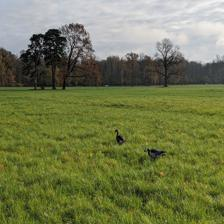

In [5]:
img

In [6]:
def prepare_img(image):
    image = img_to_array(image)
    image = np.array(image, dtype=float)
    return image

In [7]:
def prepare_x(image):
    X = rgb2lab(image/RGB_24)[:,:,0]
    X = X.reshape(1, WIDTH, HEIGHT, 1)
    return X

In [8]:
def prepare_y(image):
    Y = rgb2lab(image/RGB_24)[:, :, 1:]
    Y /= 128
    Y = Y.reshape(1, WIDTH, HEIGHT, 2)
    return Y

In [9]:
img = prepare_img(img)
X = prepare_x(img)
Y = prepare_y(img)

In [10]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(WIDTH, HEIGHT, 1)))
model.add(Conv2D(8, WINDOW, activation='relu', padding='same', strides=2))
model.add(Conv2D(8, WINDOW, activation='relu', padding='same'))
model.add(Conv2D(16, WINDOW, activation='relu', padding='same'))
model.add(Conv2D(16, WINDOW, activation='relu', padding='same', strides=2))
model.add(Conv2D(32, WINDOW, activation='relu', padding='same'))
model.add(Conv2D(32, WINDOW, activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, WINDOW, activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, WINDOW, activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, WINDOW, activation='tanh', padding='same'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 8)       584       
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 16)        2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 56, 56, 32)       0

In [12]:
model.compile(
	optimizer='RMSprop',
	loss='mse')

In [20]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
model.fit(x=X, 
	y=Y,
	batch_size=1,
	# callbacks=[tensorboard_callback],
	epochs=eph)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.0781
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.6610
Epoch 3/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2344
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0427
Epoch 5/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0179
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0164
Epoch 7/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0158
Epoch 8/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0152
Epoch 9/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0146
Epoch 10/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0142
Epoch 11/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0137
Epoch 12/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0127
Epoch 13/1000
1/1 [====================

In [25]:
# %tensorboard --logdir logs/fit/20220502-200727

In [16]:
img2 = Image.open(os.path.join(paths.TRAIN_DATA_PATH, 'resized_PXL_20201025_102120572.jpg'))
img2 = prepare_img(img2)
X2 = prepare_x(img2)

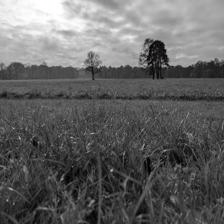

In [17]:
gray = np.zeros((WIDTH, HEIGHT, RGB_CHANELS))
gray[:, :, 0] = X2[0][:, :, 0]
Image.fromarray((lab2rgb(gray)*RGB_24).astype(np.uint8))

In [18]:
def show_predict(X):
    output = model.predict(X)
    output *= LAB_SPEC
    cur = np.zeros((WIDTH, HEIGHT, RGB_CHANELS))
    cur[:, :, 0] = X[0][:, :, 0]
    cur[:, :, 1:] = output[0]
    return Image.fromarray((lab2rgb(cur)*RGB_24).astype(np.uint8))


d:\master\.venv\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: Color data out of range: Z < 0 in 35 pixels
  return func(*args, **kwargs)


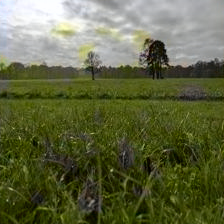

In [19]:
show_predict(X2)